###Часть 0. Импорты.

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import re
import torch as th

###Часть 1. Общий анализ результатов.

Посмотрим на результаты бейзлайна и CoT

2:30
1500/
2/5
1/2
3:40
1/4
six-
180

A:
P_1
Peter'
4/5
59000

A:
1/2
900

Q:
4/6
3/4
6

A:
Carl'
5/6


<BarContainer object of 3 artists>

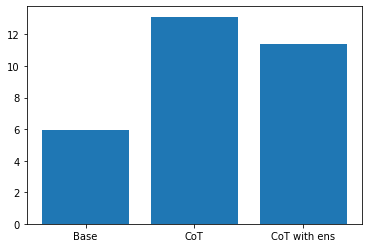

In [ ]:
exp1 = pd.read_excel('/content/exp1_base.xlsx')
exp2 = pd.read_excel('/content/exp2_base.xlsx')
exp3 = pd.read_excel('/content/exp3_base.xlsx')
res1 = []
for a, b in zip(exp1['mod_answ'], exp1['true_answ']):
  i = 0
  try:
    if np.around(float(a), 5) == np.around(float(b), 5):
      i=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(a), 5) == np.around(float(b0), 5):
        i=1
    except:
      i = 0
      print(a)
  res1.append(i)

res2 = []
for a, b in zip(exp2['mod_answ'], exp2['true_answ']):
  i=0
  try:
    if np.around(float(a), 5) == np.around(float(b), 5):
      i=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(a), 5) == np.around(float(b0), 5):
        i=1
    except:
      print(a)
  res2.append(i)

res3 = []
for a in range(1,list(exp3['tasks'])[-1]+1):
  exp3_int = exp3[exp3['tasks']==a]
  i=0
  if Counter(list(exp3_int['mod_answ'])).most_common()[0][1] >=2:
    res = Counter(list(exp3_int['mod_answ'])).most_common()[0][0]
  else:
    res = list(exp3_int['mod_answ'])[0]
  b = list(exp3_int['true_answ'])[0]
  try:
    if np.around(float(res), 5) == np.around(float(b), 5):
      i=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(res), 5) == np.around(float(b0), 5):
        i=1
    except:
      print(res)
  res3.append(i)

total1 = sum(res1)/len(res1)
total2 = sum(res2)/len(res2)
total3 = sum(res3)/len(res3)
plt.bar(['Base', 'CoT', 'CoT with ens'], [total1*100, total2*100, total3*100])

На распределение на 100 задачах при изменении количество префиксных задач

30000
A: 70000
(5:00 8
(16.5 243
(3755 83
255/2 595
cakes: 221
of.75 24
16/3 3
Suzy' 8
50000/ 25000
1/6 40
Uriah' 15
4000/ 25000
150000/ 25000
11/3 3
18/45 40
1500/ 25000
2/5 40
[6.0606060606060606, 4.040404040404041, 9.090909090909092, 5.05050505050505, 11.11111111111111, 13.131313131313133, 10.1010101010101, 10.0]


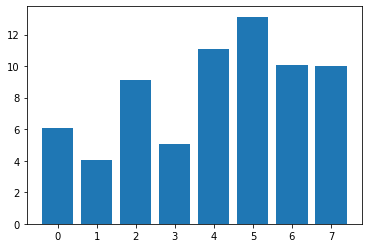

In [ ]:
exp4 = pd.read_excel('/content/exp4_base.xlsx')
tot = []
for k in range(7):
  int_res = 0
  a2 = exp4.iloc[k::7]
  for a, b in zip(a2['mod_answ'], a2['true_answ']):
    try:
      if np.around(float(a), 5) == np.around(float(b), 5):
        int_res +=1
    except:
      try:
        b0=b.replace(',', '')
        if np.around(float(a), 5) == np.around(float(b0), 5):
          int_res +=1
      except:
        print(a, b)
  total1 = int_res/len(a2['true_answ'])
  tot.append(total1*100)

a2 = exp2.iloc[:100]
int_res=0
for a, b in zip(a2['mod_answ'], a2['true_answ']):
  try:
    if np.around(float(a), 5) == np.around(float(b), 5):
      int_res +=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(a), 5) == np.around(float(b0), 5):
        int_res +=1
    except:
      print(a, b)
total1 = int_res/len(a2['true_answ'])
tot.append(total1*100)
print(tot)
plt.bar([k for k in range(8)], tot)
plt.xlabel = 'Number of shots'
plt.ylabel='Percentage of true answers'

На распределение при изменении температуры.

Brandon' 8
10000/ 25000
1500/ 25000
2/5 40
[10.1010101010101, 15.151515151515152, 8.080808080808081, 10.0]


<BarContainer object of 4 artists>

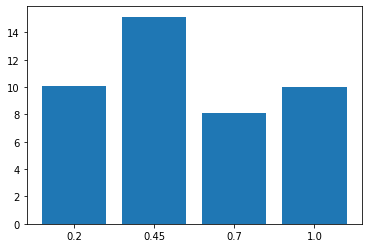

In [ ]:
exp5 = pd.read_excel('/content/exp5_base.xlsx')
tot = []
for k in range(3):
  int_res = 0
  a2 = exp5.iloc[k::3]
  for a, b in zip(a2['mod_answ'], a2['true_answ']):
    try:
      if np.around(float(a), 5) == np.around(float(b), 5):
        int_res +=1
    except:
      try:
        b0=b.replace(',', '')
        if np.around(float(a), 5) == np.around(float(b0), 5):
          int_res +=1
      except:
        print(a, b)
  total1 = int_res/len(a2['true_answ'])
  tot.append(total1*100)

a2 = exp2.iloc[:100]
int_res=0
for a, b in zip(a2['mod_answ'], a2['true_answ']):
  try:
    if np.around(float(a), 5) == np.around(float(b), 5):
      int_res +=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(a), 5) == np.around(float(b0), 5):
        int_res +=1
    except:
      print(a, b)
total1 = int_res/len(a2['true_answ'])
tot.append(total1*100)
print(tot)
plt.bar(['0.2', '0.45', '0.7', '1.0'], tot)

Голосуем!!!!

In [ ]:
res4 = []
for b in range(1,100):
  exp4_inter = exp4[exp4['tasks']==b]
  if Counter(list(exp4_inter['mod_answ'])).most_common()[0][1] >=2:
    res = Counter(list(exp4_inter['mod_answ'])).most_common()[0][0]
  else:
    res = list(exp4_inter['mod_answ'])[5]
  b = list(exp4_inter['true_answ'])[0]
  i=0
  try:
    if np.around(float(res), 5) == np.around(float(b), 5):
      i=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(res), 5) == np.around(float(b0), 5):
        i=1
    except:
      print(a, b)
  res4.append(i)
print(sum(res4))

res5 = []
for b in range(1,100):
  exp5_inter = exp5[exp5['tasks']==b]
  if Counter(list(exp5_inter['mod_answ'])).most_common()[0][1] >=2:
    res = Counter(list(exp5_inter['mod_answ'])).most_common()[0][0]
  else:
    res = list(exp5_inter['mod_answ'])[0]
  b = list(exp5_inter['true_answ'])[0]
  i=0
  try:
    if np.around(float(res), 5) == np.around(float(b), 5):
      i=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(res), 5) == np.around(float(b0), 5):
        i=1
    except:
      print(a, b)
  res5.append(i)
print(sum(res5))

14
235 25000
14


Забавно, что оба ансамбля дали одинаковое качество на датасете. Я проверил, это не одни и те же ответы... Зато качество достаточно хорошее.

<BarContainer object of 2 artists>

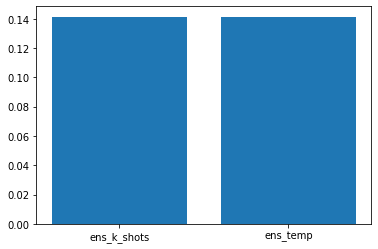

In [ ]:
tot=[]
tot.append(sum(res4)/99)
tot.append(sum(res5)/99)
plt.bar(['ens_k_shots', 'ens_temp'], tot)

Так может мы тогда вообще всех проансамблируем? Чтобы в одинаковы пропорциях входили оба ансамбля, положим оба ансамбля на голосование, но из первого возьмём только 3, 4, 5, 6.

In [ ]:
res_tot = 0
for b in range(1,100):
  exp4_inter = exp4[exp4['tasks']==b]
  exp5_inter = exp5[exp5['tasks']==b]
  lis1 = list(exp4_inter['mod_answ'])[2:6] + list(exp5_inter['mod_answ'])
  if Counter(lis1).most_common()[0][1] >=2:
    res = Counter(lis1).most_common()[0][0]
  else:
    res = list(lis1)[5]
  b = list(exp4_inter['true_answ'])[0]
  try:
    if np.around(float(res), 5) == np.around(float(b), 5):
      res_tot +=1
  except:
    try:
      b0=b.replace(',', '')
      if np.around(float(res), 5) == np.around(float(b0), 5):
        res_tot +=1
    except:
      print(a, b)
print(res_tot)

16


Ещё чуть-чуть улучшилось!!!

<BarContainer object of 1 artists>

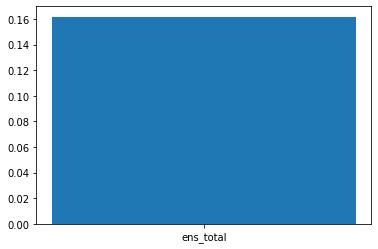

In [ ]:
tot=[]
tot.append(res_tot/99)
plt.bar(['ens_total'], tot)

###Часть 2. Исследование зависимости от сложности.

In [ ]:
!git clone https://github.com/openai/grade-school-math.git

Cloning into 'grade-school-math'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 36 (delta 10), reused 7 (delta 7), pack-reused 16
Unpacking objects: 100% (36/36), 3.13 MiB | 3.68 MiB/s, done.


In [ ]:
###FROM https://github.com/openai/grade-school-math.git

def read_jsonl(path: str):
    with open(path) as fh:
        return [json.loads(line) for line in fh.readlines() if line]


def get_examples(split):
    path = os.path.join("/content/grade-school-math/grade_school_math/data", f"{split}.jsonl")
    examples = read_jsonl(path)

    for ex in examples:
        ex.update(question=ex["question"] + "\n")
        ex.update(answer=ex["answer"] + "<|endoftext|>")

    print(f"{len(examples)} {split} examples")
    return examples
###ENDFROM

In [ ]:
get_examples('test')[1]

1319 test examples


{'question': 'A robe takes 2 bolts of blue fiber and half that much white fiber.  How many bolts in total does it take?\n',
 'answer': 'It takes 2/2=<<2/2=1>>1 bolt of white fiber\nSo the total amount of fabric is 2+1=<<2+1=3>>3 bolts of fabric\n#### 3<|endoftext|>'}

In [ ]:
a = get_examples('test')
compl = []
for i in range(1,100):
  b = a[i]
  complexity = b['answer'].count('\n')
  compl.append(complexity)

1319 test examples


In [ ]:
total = pd.DataFrame([compl, res1, res2, res3, res4, res5], index = ['complexity', 'baseline', 'CoT', 'CoT with ens', 'ens_k_shots', 'ens_temp']).T
total.head()

,complexity,baseline,CoT,CoT with ens,ens_k_shots,ens_temp
0,2.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,1.0,0.0,0.0,0.0
2,2.0,0.0,0.0,1.0,1.0,1.0
3,2.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


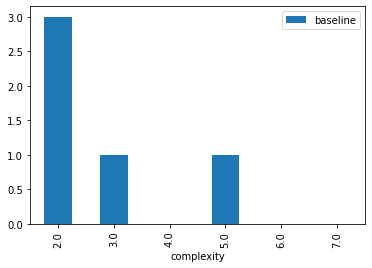

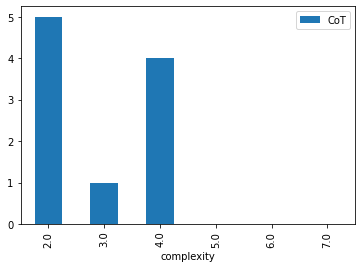

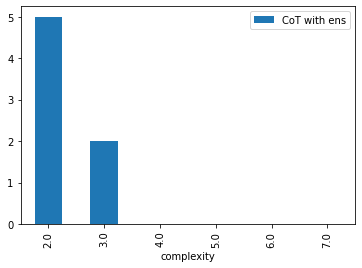

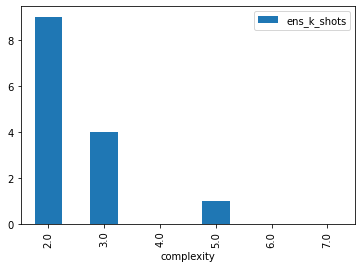

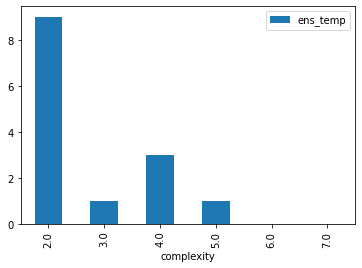

In [ ]:
for model in ['baseline', 'CoT', 'CoT with ens', 'ens_k_shots', 'ens_temp']:
  print(pd.pivot_table(total, index = 'complexity', values = model, aggfunc=np.sum).plot.bar())